### **Support Vector Machines (SVM)**

1.   Load and prepare a dataset for binary classification.
2.   Train an SVM with linear and RBF kernel.
3.   Visualize decision boundary using 2D data.
4.   Tune hyperparameters like C and gamma.
5.   Use cross-validation to evaluate performance.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/breast-cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Preprocess the Data

Drop the ID Column

Encode the target variable (Malignant: 1, Benign: 0)

In [6]:
df.drop(columns=['id'], inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split the dataset into training and testing sets.


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train the SVM with Linear Kernel

In [9]:
from sklearn.svm import SVC

In [10]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

Train the SVM with RBF Kernel

In [11]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

Visualize decision boundaries by reducing the data to 2 dimensions using PCA.

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

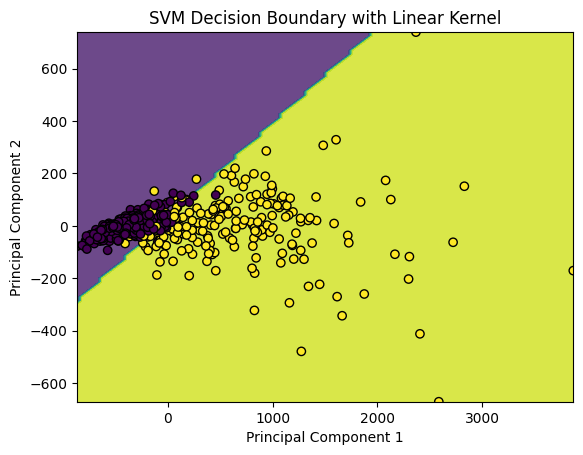

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

svm_model = SVC(kernel='linear')
svm_model.fit(X_pca, y)

xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
plt.title("SVM Decision Boundary with Linear Kernel")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

GridSearchCV to tune hyperparameters like C and gamma.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'svc__C': 10, 'svc__gamma': 0.01}


Evaluate the performance of the model using cross-validation.

In [16]:
from sklearn.model_selection import cross_val_score

In [21]:
best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean score: 0.9789318428815401
